# Brazil COVID-19 Hospital Dataset

By considering the provided data we need to predict the covid pos+ or neg- by using following medical reports

Importing the required libraries as shown below

Data Analysing

Data Visualization

Exploratory data analysis(EDA)

Data Preprocessing

Model Building

Cross Validation and Prediction

Grid Search

Saving the model with joblib

Conclusion

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
#calling excel dataset 

data=pd.read_excel('covid19brazil.xlsx')

In [3]:
data

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#these are the columns of our dataset

data.columns.values

array(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)',
       'Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
       'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)',
       'Eosinophils', 'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)', 'Serum Glucose',
       'Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Mycoplasma pneumoniae', 'Coronavirus HKU1', 'Parainfluenza 3',
       'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4',
       'Coronavirus229E', 'CoronavirusOC43', 'Inf A H1N1 2009',
       'Bordetella p

In [5]:
#finding null values

data.isnull().sum().values

array([   0,    0,    0,    0,    0,    0, 5041, 5041, 5042, 5045, 5042,
       5042, 5042, 5042, 5042, 5042, 5042, 5042, 5043, 5042, 5436, 4290,
       4290, 4290, 4292, 4292, 4292, 5644, 4292, 4292, 4292, 4292, 4292,
       4292, 4292, 4292, 4292, 4292, 4292, 5131, 5247, 5138, 5220, 5273,
       5274, 4824, 4824, 5419, 5418, 5491, 5462, 5462, 5462, 5500, 5594,
       5312, 5604, 5508, 5508, 5508, 5508, 5643, 5508, 5508, 5508, 5547,
       5547, 5547, 5547, 5547, 5547, 5584, 5574, 5574, 5574, 5574, 5587,
       5643, 5574, 5575, 5584, 5644, 5574, 5574, 5574, 5577, 5575, 5574,
       5574, 5644, 5553, 5511, 5543, 5644, 5641, 5540, 5621, 5617, 5636,
       5644, 5631, 5617, 5617, 5617, 5617, 5617, 5617, 5617, 5624, 5624,
       5617], dtype=int64)

In [6]:
#finding data types of the columns 

data.dtypes.values

array([dtype('O'), dtype('int64'), dtype('O'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('float64'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('O'), dtype('O'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('O'), dtype('float64'),
       dt

In [7]:
#To get the descriptive analysis 

data.describe()

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
count,5644.000000,5644.000000,5644.000000,5644.000000,6.030000e+02,6.030000e+02,6.020000e+02,5.990000e+02,6.020000e+02,6.020000e+02,...,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.000000e+01,2.000000e+01,2.700000e+01
mean,9.318391,0.013997,0.008859,0.007264,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,8.424447e-09,-7.866736e-09,...,-1.379737e-10,8.416397e-09,-1.655685e-09,4.139211e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656613e-09,6.332993e-09,5.243001e-09
std,5.777903,0.117489,0.093713,0.084929,1.000830e+00,1.000830e+00,1.000832e+00,1.000836e+00,1.000832e+00,1.000832e+00,...,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.025978e+00,1.025978e+00,1.019049e+00
min,0.000000,0.000000,0.000000,0.000000,-4.501420e+00,-4.345603e+00,-2.552426e+00,-2.457575e+00,-3.970608e+00,-1.865070e+00,...,-1.999560e+00,-1.244817e+00,-3.082674e+00,-3.568877e+00,-2.925618e+00,-2.985592e+00,-1.175907e+00,-1.532932e+00,-1.480526e+00,-2.900254e+00
25%,4.000000,0.000000,0.000000,0.000000,-5.188074e-01,-5.862439e-01,-6.053457e-01,-6.624832e-01,-5.679496e-01,-7.307069e-01,...,-1.122574e+00,-5.348102e-01,-3.308668e-01,-9.210583e-02,-5.117720e-01,-5.397211e-01,-8.169898e-01,-1.214975e-01,-5.527296e-01,-4.852787e-01
50%,9.000000,0.000000,0.000000,0.000000,5.340703e-02,4.031596e-02,-1.217160e-01,-1.015171e-01,1.385207e-02,-1.426696e-02,...,2.677689e-01,-2.120799e-01,-1.181667e-02,2.942021e-01,7.743482e-02,5.633191e-02,-1.599549e-01,-1.174366e-02,-1.381825e-01,1.826928e-01
75%,14.000000,0.000000,0.000000,0.000000,7.171751e-01,7.295320e-01,5.314981e-01,6.838353e-01,6.661759e-01,5.976919e-01,...,7.383496e-01,2.305214e-02,6.661649e-01,5.115003e-01,4.385609e-01,5.085100e-01,4.500090e-01,-1.174366e-02,2.763648e-01,5.937525e-01
max,19.000000,1.000000,1.000000,1.000000,2.662704e+00,2.671868e+00,9.532034e+00,3.713052e+00,3.645706e+00,3.764100e+00,...,1.337265e+00,3.236524e+00,1.703078e+00,1.042674e+00,1.940087e+00,2.029471e+00,2.205371e+00,2.841856e+00,2.862350e+00,1.826932e+00


In [8]:
# Number of each type of column

data.dtypes.value_counts()

float64    70
object     37
int64       4
dtype: int64

In [9]:
# Number of unique classes in each object column

data.select_dtypes('object').nunique()

Patient ID                     5644
SARS-Cov-2 exam result            2
Respiratory Syncytial Virus       2
Influenza A                       2
Influenza B                       2
Parainfluenza 1                   2
CoronavirusNL63                   2
Rhinovirus/Enterovirus            2
Coronavirus HKU1                  2
Parainfluenza 3                   2
Chlamydophila pneumoniae          2
Adenovirus                        2
Parainfluenza 4                   2
Coronavirus229E                   2
CoronavirusOC43                   2
Inf A H1N1 2009                   2
Bordetella pertussis              2
Metapneumovirus                   2
Parainfluenza 2                   1
Influenza B, rapid test           2
Influenza A, rapid test           2
Strepto A                         3
Urine - Esterase                  2
Urine - Aspect                    4
Urine - pH                       15
Urine - Hemoglobin                3
Urine - Bile pigments             2
Urine - Ketone Bodies       

# Data Preprocessing

In [10]:
#these are the columns which have object as thier data tyes

data.select_dtypes(include=[np.object]).columns

Index(['Patient ID', 'SARS-Cov-2 exam result', 'Respiratory Syncytial Virus',
       'Influenza A', 'Influenza B', 'Parainfluenza 1', 'CoronavirusNL63',
       'Rhinovirus/Enterovirus', 'Coronavirus HKU1', 'Parainfluenza 3',
       'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4',
       'Coronavirus229E', 'CoronavirusOC43', 'Inf A H1N1 2009',
       'Bordetella pertussis', 'Metapneumovirus', 'Parainfluenza 2',
       'Influenza B, rapid test', 'Influenza A, rapid test', 'Strepto A',
       'Urine - Esterase', 'Urine - Aspect', 'Urine - pH',
       'Urine - Hemoglobin', 'Urine - Bile pigments', 'Urine - Ketone Bodies',
       'Urine - Nitrite', 'Urine - Urobilinogen', 'Urine - Protein',
       'Urine - Leukocytes', 'Urine - Crystals', 'Urine - Hyaline cylinders',
       'Urine - Granular cylinders', 'Urine - Yeasts', 'Urine - Color'],
      dtype='object')

In [11]:
#fill in mean for all floats columns using for loop 

for a in data.columns:
    if data[a].dtype=='float64':
        data[a].fillna(data[a].mean())
    
data = data.fillna(-999)    

In [12]:
# Label Encoding for all the object data type columns using for loop

for a in data.columns:
    if data[a].dtype=='object': 
        le = LabelEncoder()
        le.fit(list(data[a].values))
        data[a] = le.transform(list(data[a].values))

In [13]:
#data after label encoder

data

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,1588,13,0,0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1,451,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,3669,8,0,0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3,5457,5,0,0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
4,4843,15,0,0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3892,3,1,0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
5640,1860,17,0,0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
5641,2125,4,0,0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
5642,4316,10,0,0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


In [14]:
#finding object type after label encoding

data.dtypes.values=='Object'

C:\Users\Suhas\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  This is separate from the ipykernel package so we can avoid doing imports until


False

In [15]:
#droping the columns with null values

datafin=data.dropna(axis=1)

In [16]:
corr_abs=datafin.corr().abs()
corr_abs

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
Patient ID,1.000000,0.014136,0.018664,0.003748,0.004803,0.000162,0.002173,0.002167,0.001974,0.002017,...,0.002856,0.002832,0.002847,0.002854,0.002839,0.002840,0.002850,0.005929,0.007077,0.002847
Patient age quantile,0.014136,1.000000,0.075244,0.046166,0.015736,0.035772,0.109140,0.109128,0.109860,0.107703,...,0.051720,0.051703,0.051778,0.051778,0.051743,0.051749,0.051730,0.050366,0.020413,0.051732
SARS-Cov-2 exam result,0.018664,0.075244,1.000000,0.142437,0.019364,0.027586,0.044974,0.044976,0.045045,0.042017,...,0.088889,0.088836,0.088889,0.088910,0.088845,0.088849,0.088910,0.070122,0.009768,0.088905
"Patient addmited to regular ward (1=yes, 0=no)",0.003748,0.046166,0.142437,1.000000,0.011264,0.010192,0.241889,0.241885,0.242051,0.238041,...,0.144795,0.144685,0.144753,0.144797,0.144703,0.144710,0.144771,0.145138,0.007105,0.144815
"Patient addmited to semi-intensive unit (1=yes, 0=no)",0.004803,0.015736,0.019364,0.011264,1.000000,0.008087,0.224213,0.224218,0.224609,0.225239,...,0.267281,0.267521,0.267400,0.267417,0.267440,0.267432,0.267359,0.153438,0.185337,0.267463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HCO3 (arterial blood gas analysis),0.002840,0.051749,0.088849,0.144710,0.267432,0.145389,0.200442,0.200443,0.200578,0.201301,...,0.999999,1.000000,1.000000,0.999999,1.000000,1.000000,0.999999,0.860234,0.082436,0.999999
pO2 (arterial blood gas analysis),0.002850,0.051730,0.088910,0.144771,0.267359,0.145308,0.200442,0.200444,0.200578,0.201301,...,1.000000,0.999999,0.999999,0.999999,0.999999,0.999999,1.000000,0.860155,0.082330,0.999999
Arteiral Fio2,0.005929,0.050366,0.070122,0.145138,0.153438,0.170561,0.172408,0.172403,0.172533,0.173161,...,0.860119,0.860242,0.860133,0.860032,0.860241,0.860234,0.860155,1.000000,0.096879,0.860133
Phosphor,0.007077,0.020413,0.009768,0.007105,0.185337,0.170495,0.172253,0.172271,0.172736,0.173096,...,0.082348,0.082500,0.082291,0.082210,0.082452,0.082436,0.082330,0.096879,1.000000,0.082238


In [17]:
# Threshold for removing correlated variables

threshold = 0.90
upper = corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(np.bool))
upper

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
Patient ID,NaN,0.014136,0.018664,0.003748,0.004803,0.000162,0.002173,0.002167,0.001974,0.002017,...,0.002856,0.002832,0.002847,0.002854,0.002839,0.002840,0.002850,0.005929,0.007077,0.002847
Patient age quantile,NaN,NaN,0.075244,0.046166,0.015736,0.035772,0.109140,0.109128,0.109860,0.107703,...,0.051720,0.051703,0.051778,0.051778,0.051743,0.051749,0.051730,0.050366,0.020413,0.051732
SARS-Cov-2 exam result,NaN,NaN,NaN,0.142437,0.019364,0.027586,0.044974,0.044976,0.045045,0.042017,...,0.088889,0.088836,0.088889,0.088910,0.088845,0.088849,0.088910,0.070122,0.009768,0.088905
"Patient addmited to regular ward (1=yes, 0=no)",NaN,NaN,NaN,NaN,0.011264,0.010192,0.241889,0.241885,0.242051,0.238041,...,0.144795,0.144685,0.144753,0.144797,0.144703,0.144710,0.144771,0.145138,0.007105,0.144815
"Patient addmited to semi-intensive unit (1=yes, 0=no)",NaN,NaN,NaN,NaN,NaN,0.008087,0.224213,0.224218,0.224609,0.225239,...,0.267281,0.267521,0.267400,0.267417,0.267440,0.267432,0.267359,0.153438,0.185337,0.267463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HCO3 (arterial blood gas analysis),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.999999,0.860234,0.082436,0.999999
pO2 (arterial blood gas analysis),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.860155,0.082330,0.999999
Arteiral Fio2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.096879,0.860133
Phosphor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.082238


In [34]:
# Select columns with correlations above threshold

drop_col = [column for column in upper.columns if any(upper[column] > threshold)]

datafinal = datafin.drop(columns = drop_col)
datafinal

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Serum Glucose,Respiratory Syncytial Virus,Mycoplasma pneumoniae,...,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Arteiral Fio2,Phosphor
0,1588,13,0,0,0,0,-999.000000,-999.000000,0,-999.0,...,-999.0,-999.0,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1,451,17,0,0,0,0,0.236515,-0.140648,2,-999.0,...,-999.0,-999.0,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,3669,8,0,0,0,0,-999.000000,-999.000000,0,-999.0,...,-999.0,-999.0,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3,5457,5,0,0,0,0,-999.000000,-999.000000,0,-999.0,...,-999.0,-999.0,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
4,4843,15,0,0,0,0,-999.000000,-999.000000,2,-999.0,...,-999.0,-999.0,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3892,3,1,0,0,0,-999.000000,-999.000000,0,-999.0,...,-999.0,-999.0,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
5640,1860,17,0,0,0,0,-999.000000,-999.000000,0,-999.0,...,-999.0,-999.0,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
5641,2125,4,0,0,0,0,-999.000000,-999.000000,0,-999.0,...,-999.0,-999.0,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
5642,4316,10,0,0,0,0,-999.000000,-999.000000,0,-999.0,...,-999.0,-999.0,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


In [35]:
#these are the columns which are dropped

drop_col

['Hemoglobin',
 'Platelets',
 'Mean platelet volume ',
 'Red blood Cells',
 'Lymphocytes',
 'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
 'Leukocytes',
 'Basophils',
 'Mean corpuscular hemoglobin (MCH)',
 'Eosinophils',
 'Mean corpuscular volume (MCV)',
 'Monocytes',
 'Red blood cell distribution width (RDW)',
 'Influenza A',
 'Influenza B',
 'Parainfluenza 1',
 'CoronavirusNL63',
 'Rhinovirus/Enterovirus',
 'Coronavirus HKU1',
 'Parainfluenza 3',
 'Chlamydophila pneumoniae',
 'Adenovirus',
 'Parainfluenza 4',
 'Coronavirus229E',
 'CoronavirusOC43',
 'Inf A H1N1 2009',
 'Bordetella pertussis',
 'Metapneumovirus',
 'Parainfluenza 2',
 'Neutrophils',
 'Proteina C reativa mg/dL',
 'Creatinine',
 'Potassium',
 'Sodium',
 'Influenza A, rapid test',
 'Aspartate transaminase',
 'Direct Bilirubin',
 'Indirect Bilirubin',
 'Alkaline phosphatase',
 'Hb saturation (venous blood gas analysis)',
 'Base excess (venous blood gas analysis)',
 'pO2 (venous blood gas analysis)',
 'Total CO2 (v

# Data Visualization

In [37]:
#final dataset after preprocessing 

datafinal

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Serum Glucose,Respiratory Syncytial Virus,Mycoplasma pneumoniae,...,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Arteiral Fio2,Phosphor
0,1588,13,0,0,0,0,-999.000000,-999.000000,0,-999.0,...,-999.0,-999.0,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1,451,17,0,0,0,0,0.236515,-0.140648,2,-999.0,...,-999.0,-999.0,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,3669,8,0,0,0,0,-999.000000,-999.000000,0,-999.0,...,-999.0,-999.0,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3,5457,5,0,0,0,0,-999.000000,-999.000000,0,-999.0,...,-999.0,-999.0,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
4,4843,15,0,0,0,0,-999.000000,-999.000000,2,-999.0,...,-999.0,-999.0,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3892,3,1,0,0,0,-999.000000,-999.000000,0,-999.0,...,-999.0,-999.0,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
5640,1860,17,0,0,0,0,-999.000000,-999.000000,0,-999.0,...,-999.0,-999.0,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
5641,2125,4,0,0,0,0,-999.000000,-999.000000,0,-999.0,...,-999.0,-999.0,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
5642,4316,10,0,0,0,0,-999.000000,-999.000000,0,-999.0,...,-999.0,-999.0,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


In [38]:
#dataset columns

datafinal.columns

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Serum Glucose', 'Respiratory Syncytial Virus', 'Mycoplasma pneumoniae',
       'Urea', 'Influenza B, rapid test', 'Alanine transaminase',
       'Gamma-glutamyltransferase ', 'Total Bilirubin', 'Ionized calcium ',
       'Strepto A', 'Magnesium', 'pCO2 (venous blood gas analysis)',
       'Fio2 (venous blood gas analysis)', 'Rods #', 'Urine - Esterase',
       'Urine - Aspect', 'Urine - pH', 'Urine - Hemoglobin', 'Urine - Nitrite',
       'Urine - Sugar', 'Urine - Leukocytes', 'Urine - Crystals',
       'Partial thromboplastin time (PTT) ', 'Relationship (Patient/Normal)',
       'International normalized ratio (INR)', 'Lactic Dehydrogenase',
       'Prothrombin time (PT), Activity', 'Vitamin B12',
       'Creati

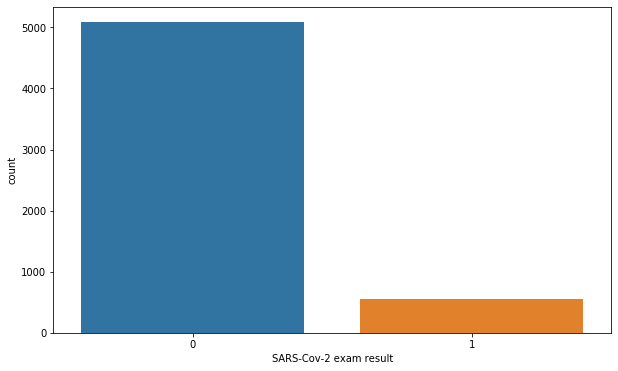

In [21]:
#univariate plot

plt.figure(figsize=(10,6))
sb.countplot(data['SARS-Cov-2 exam result'])

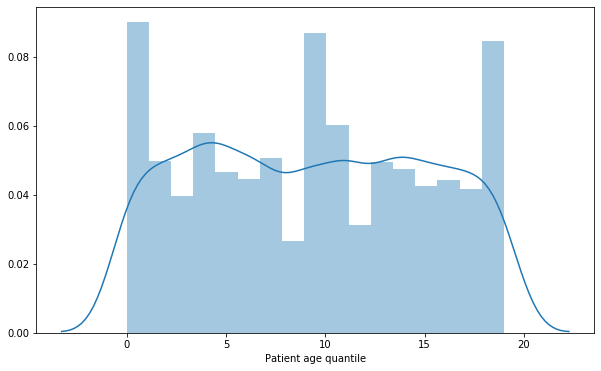

In [22]:
plt.figure(figsize=(10,6))
sb.distplot(data['Patient age quantile'])

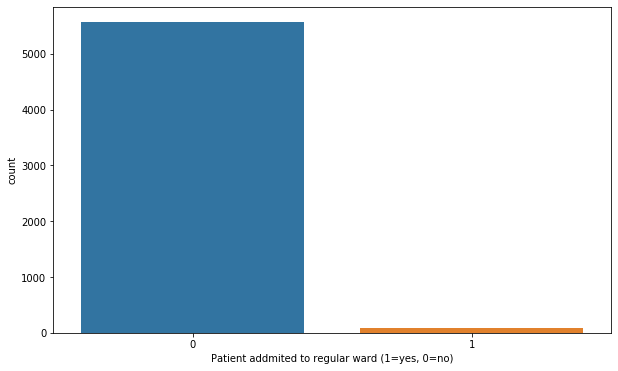

In [23]:
plt.figure(figsize=(10,6))
sb.countplot(data['Patient addmited to regular ward (1=yes, 0=no)'])

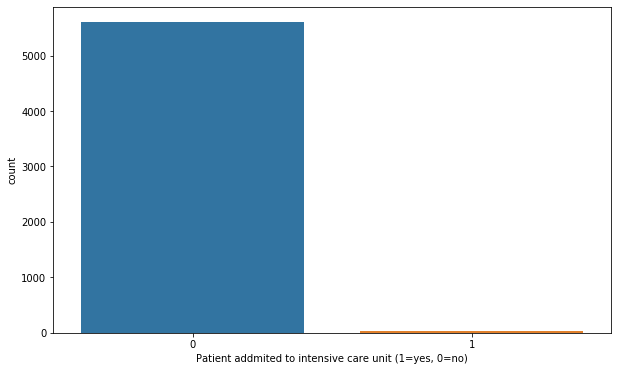

In [24]:
plt.figure(figsize=(10,6))
sb.countplot(data['Patient addmited to intensive care unit (1=yes, 0=no)'])

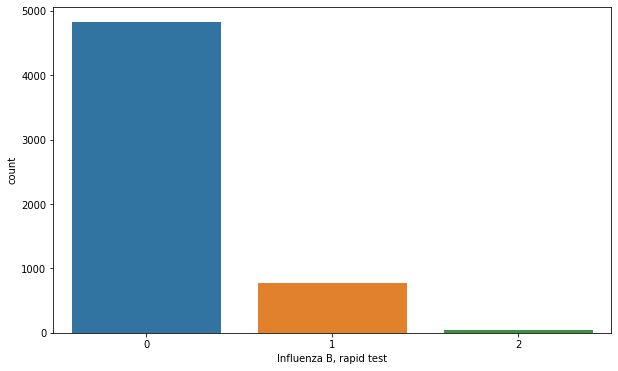

In [25]:
plt.figure(figsize=(10,6))
sb.countplot(data['Influenza B, rapid test'])

In [74]:
# the Correlation between the different variables

datafinal.corr()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Serum Glucose,Respiratory Syncytial Virus,Mycoplasma pneumoniae,...,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Arteiral Fio2,Phosphor
Patient ID,1.000000,-0.014136,-0.018664,0.003748,-0.004803,0.000162,-0.002173,0.003019,0.003093,NaN,...,NaN,0.002073,-0.004570,0.010426,-0.002842,-0.010422,NaN,-0.005787,0.005929,-0.007077
Patient age quantile,-0.014136,1.000000,0.075244,0.046166,0.015736,-0.035772,0.109140,0.086764,-0.004644,NaN,...,NaN,0.033328,0.018430,0.024904,0.051744,0.017475,NaN,0.015257,0.050366,0.020413
SARS-Cov-2 exam result,-0.018664,0.075244,1.000000,0.142437,0.019364,0.027586,0.044974,0.039177,-0.027175,NaN,...,NaN,-0.007639,0.056124,-0.002541,0.088860,0.034866,NaN,-0.015915,0.070122,-0.009768
"Patient addmited to regular ward (1=yes, 0=no)",0.003748,0.046166,0.142437,1.000000,-0.011264,-0.010192,0.241889,0.192866,0.135667,NaN,...,NaN,-0.002748,0.151856,0.039789,0.144724,0.075730,NaN,-0.005725,0.145138,-0.007105
"Patient addmited to semi-intensive unit (1=yes, 0=no)",-0.004803,0.015736,0.019364,-0.011264,1.000000,-0.008087,0.224213,0.212469,0.115459,NaN,...,NaN,0.079927,0.155760,0.023645,0.267489,-0.003562,NaN,0.034811,0.153438,0.185337
"Patient addmited to intensive care unit (1=yes, 0=no)",0.000162,-0.035772,0.027586,-0.010192,-0.008087,1.000000,0.166123,0.105147,0.093330,NaN,...,NaN,-0.001973,0.112380,0.027404,0.145193,-0.003223,NaN,-0.004110,0.170561,0.170495
Hematocrit,-0.002173,0.109140,0.044974,0.241889,0.224213,0.166123,1.000000,0.565538,0.298170,NaN,...,NaN,0.066629,0.391814,0.184929,0.200442,0.108930,NaN,0.126953,0.172408,0.172253
Serum Glucose,0.003019,0.086764,0.039177,0.192866,0.212469,0.105147,0.565538,1.000000,0.218814,NaN,...,NaN,0.036350,0.273932,0.164630,0.204611,0.042557,NaN,0.108213,0.162550,0.130776
Respiratory Syncytial Virus,0.003093,-0.004644,-0.027175,0.135667,0.115459,0.093330,0.298170,0.218814,1.000000,NaN,...,NaN,0.005380,0.170468,-0.009307,0.095316,0.001328,NaN,-0.000545,0.079894,0.037447
Mycoplasma pneumoniae,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Model Building

Assigning Independent and Dependent Variables

Here x is considered as Independent variable

y is Dependent Variables

In [46]:
x=datafinal.drop(['SARS-Cov-2 exam result'],axis=1)
y=datafinal['SARS-Cov-2 exam result']

In [65]:
print(x.shape)
print(y.shape)

(5644, 42)
(5644,)


In [47]:
#Preprocessing the data withStandardScaler

sc = StandardScaler()
x= sc.fit_transform(x)

We will split the data into a training and a test part. The models will be trained on the training data set and tested on the test data set

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=300)

In [66]:
#working on RandomForestRegressor 
#training and testing data using RandomForestRegressor

rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)

In [67]:
#Accuracy score of above module
print ('Accuracy score:')
print (accuracy_score(y_test,pred.round())*100)
print ('-'*40)
#Confusion Matrix of above module
print ('Confusion Matrix:')
print (confusion_matrix(y_test,pred.round()))
print ('-'*40)
#Classification Matrix of above module
print ('Classification Matrix:')
print (classification_report(y_test,pred.round()))

Accuracy score:
88.39681133746679
----------------------------------------
Confusion Matrix:
[[990  44]
 [ 87   8]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1034
           1       0.15      0.08      0.11        95

    accuracy                           0.88      1129
   macro avg       0.54      0.52      0.52      1129
weighted avg       0.85      0.88      0.87      1129



In [51]:
#cross valiadtion
score=cross_val_score(rfr,x,y,cv=5)
print('mean score :',score.mean())
print('STD score:',score.std())
print()
#cross prediction
predscore=cross_val_predict(rfr,x,y,cv=5)
print("cross prediction",predscore)

mean score : -1.1774589863755716
STD score: 1.6681631431843222

cross prediction [0.02 0.01 0.16 ... 0.04 0.16 0.1 ]


In [55]:
#working on DecisionTreeRegressor 
#training and testing data using DecisionTreeRegressor

dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)

In [56]:
#Accuracy score of above module
print ('Accuracy score:')
print (accuracy_score(y_test,pred.round())*100)
print ('-'*40)
#Confusion Matrix of above module
print ('Confusion Matrix:')
print (confusion_matrix(y_test,pred.round()))
print ('-'*40)
#Classification Matrix of above module
print ('Classification Matrix:')
print (classification_report(y_test,pred.round()))

Accuracy score:
82.99379982285208
----------------------------------------
Confusion Matrix:
[[928 106]
 [ 86   9]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1034
           1       0.08      0.09      0.09        95

    accuracy                           0.83      1129
   macro avg       0.50      0.50      0.50      1129
weighted avg       0.84      0.83      0.84      1129



In [57]:
#cross valiadtion
score=cross_val_score(dtr,x,y,cv=5)
print('mean score :',score.mean())
print('STD score:',score.std())
print()
#cross prediction
predscore=cross_val_predict(dtr,x,y,cv=5)
print("cross prediction",predscore)

mean score : -4.15847767173154
STD score: 5.73954686536269

cross prediction [0. 0. 0. ... 0. 0. 0.]


In [58]:
#working on GradientBoostingRegressor 
#training and testing data using GradientBoostingRegressor

gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)

In [59]:
#Accuracy score of above module
print ('Accuracy score:')
print (accuracy_score(y_test,pred.round())*100)
print ('-'*40)
#Confusion Matrix of above module
print ('Confusion Matrix:')
print (confusion_matrix(y_test,pred.round()))
print ('-'*40)
#Classification Matrix of above module
print ('Classification Matrix:')
print (classification_report(y_test,pred.round()))

Accuracy score:
91.674047829938
----------------------------------------
Confusion Matrix:
[[1028    6]
 [  88    7]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      1034
           1       0.54      0.07      0.13        95

    accuracy                           0.92      1129
   macro avg       0.73      0.53      0.54      1129
weighted avg       0.89      0.92      0.89      1129



In [60]:
#cross valiadtion
score=cross_val_score(gbr,x,y,cv=5)
print('mean score :',score.mean())
print('STD score:',score.std())
print()
#cross prediction
predscore=cross_val_predict(gbr,x,y,cv=5)
print("cross prediction",predscore)

mean score : -0.38513163055224625
STD score: 0.6171967504661312

cross prediction [ 0.12434284  0.01793977  0.1387679  ...  0.08626118  0.05244976
 -0.01503161]


In [71]:
#working on AdaBoostRegressor 
#training and testing data using AdaBoostRegressor

abr=AdaBoostRegressor()
abr.fit(x_train,y_train)
pred=abr.predict(x_test)

In [72]:
#Accuracy score of above module
print ('Accuracy score:')
print (accuracy_score(y_test,pred.round())*100)
print ('-'*40)
#Confusion Matrix of above module
print ('Confusion Matrix:')
print (confusion_matrix(y_test,pred.round()))
print ('-'*40)
#Classification Matrix of above module
print ('Classification Matrix:')
print (classification_report(y_test,pred.round()))

Accuracy score:
91.49689991142604
----------------------------------------
Confusion Matrix:
[[1027    7]
 [  89    6]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      1034
           1       0.46      0.06      0.11        95

    accuracy                           0.91      1129
   macro avg       0.69      0.53      0.53      1129
weighted avg       0.88      0.91      0.88      1129



In [73]:
#cross valiadtion
score=cross_val_score(abr,x,y,cv=5)
print('mean score :',score.mean())
print('STD score:',score.std())
print()
#cross prediction
predscore=cross_val_predict(abr,x,y,cv=5)
print("cross prediction",predscore)

mean score : -2.547106527469114
STD score: 3.6868899527087042

cross prediction [0.33787804 0.21481481 0.33787804 ... 0.09943978 0.0503124  0.0503124 ]


# Grid Search CV

GridSearchCV for RandomForestRegressor

In [62]:
param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True],
            }
gridscv = GridSearchCV(estimator=rfr, param_grid=param_grid, n_jobs=-1, cv=5)
gridscv.fit(x_train, y_train)
print(gridscv)
print('best score :',gridscv.best_score_)
print('best params :',gridscv.best_params_)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [61]:
param_grid = {'learning_rate': [0.1, 1], 
              'max_depth': [5,10]
}
gridscv = GridSearchCV( estimator=gbr, param_grid=param_grid, cv=5, n_jobs = -1)
gridscv.fit(x_train,y_train)
print(gridscv)
print('best score :',gridscv.best_score_)
print('best params :',gridscv.best_params_)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                 

# Saving the model with joblib

In [64]:
# Save the best model with the help of joblib and pickle

joblib.dump(rfr,'brazil.pkl')

['brazil.pkl']

# Conclusion

Importing the required libraries Analysing the dataset by check various aspects..

Data Visualization is done by Univariate bivariate and multivariate to get a better insight of the data..

Exploratory data analysis and Data Preprocessing is used to prepare the data for modeling

data is tarined and tested using different Models ,this includes working with metrics and cross validation,gridsearch rtc

Saving the best model with joblib